# Music Genre Classification using Spotify API

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy


## Gathering the Data 
- To create dataset, pull data using the Spotipy Library to access the Spotify API.
- 1,000 songs from each of the following genres were pulled: **Pop, Rock, Country, EDM, Rap, and Classical**
- For each song, features such as "danceability", "energy", "loudness", "speechiness", and "acousticness" are recorded into a dataframe.


In [48]:
# Spotify Client ID needed for API
cid = 'e21fac1ac27b472bb579f569fab7f167'
secret = 'febd3a4f0dc34c1099ce2939aefec727'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
# Create dictionary of features that will be pulled from each song
features = {
            "genre" : [],
            "artist_name": [],
            "track_name": [],
            "track_id": [],
            "popularity": [],
            "danceability": [],
            "energy": [],
            "key": [],
            'loudness': [],
            'mode': [],
            'speechiness': [],
            'acousticness': [],
            'instrumentalness': [],
            'liveness': [],
            'valence': [],
            'tempo': [],
            'duration_ms': []
            }

genres = ['pop', 'rock', 'country', 'EDM', 'rap', 'classical']

# Search Spotify by genre and add feature values of each song to the features dictionary
for genre in genres:
    genreS = "genre:" + genre
    for i in range (0,1000,50):
        results = sp.search(q=genreS, type='track', limit=50,offset=i)

        for track in results['tracks']['items']:
            features['artist_name'].append(track['artists'][0]['name'])
            features['track_name'].append(track['name'])
            features['track_id'].append(track['id'])
            features['popularity'].append(track['popularity'])
            features['genre'].append(genre)
            audio_features = sp.audio_features(track['id'])
            features['danceability'].append(audio_features[0]["danceability"])
            features['energy'].append(audio_features[0]["energy"])
            features['key'].append(audio_features[0]["key"])
            features['loudness'].append(audio_features[0]["loudness"])
            features['mode'].append(audio_features[0]["mode"])
            features['speechiness'].append(audio_features[0]["speechiness"])
            features['acousticness'].append(audio_features[0]["acousticness"])
            features['instrumentalness'].append(audio_features[0]["instrumentalness"])
            features['liveness'].append(audio_features[0]["liveness"])
            features['valence'].append(audio_features[0]["valence"])
            features['tempo'].append(audio_features[0]["tempo"])
            features['duration_ms'].append(audio_features[0]["duration_ms"])
            
# Create a dataframe from the dictionary values           
class_df = pd.DataFrame.from_dict(features)

In [ ]:
class_df.drop_duplicates(subset = ["track_id"], inplace=True)

In [104]:
# Save as csv to avoid pulling the data again
#class_df.to_csv("class_data.csv", index=False)

## Exploratory Data Analysis

- Observe patterns in potential predictor variables by using `df.corr()` to look at correlation between every numeric feature.

- **Acousticness** and **Instrumentalness** are highly correlated.

- **Energy**, **loudness**, and **popularity**, and to a lesser extent **danceability**, are all positively correlated. 
    - These four features are very strongly *negatively* correlated to the two features mentioned above. 

<AxesSubplot:>

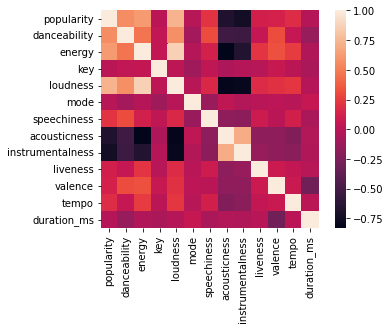

In [2]:
data = pd.read_csv("class_data.csv")
non_numerics = ["genre", "artist_name", "track_name", "track_id"]

sns.heatmap(data.drop(columns=non_numerics).corr(), square=True)

In [3]:
data.drop(columns=non_numerics).corr()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
popularity,1.000000,0.566782,0.627818,0.006825,0.732033,-0.001868,0.218720,-0.677459,-0.738437,0.114507,0.129595,0.187734,-0.020565
danceability,0.566782,1.000000,0.464818,0.035819,0.576125,-0.082975,0.318738,-0.529890,-0.544162,0.055548,0.314671,0.052526,-0.139442
energy,0.627818,0.464818,1.000000,0.046351,0.868503,-0.014555,0.122490,-0.830436,-0.659511,0.221310,0.332571,0.252028,-0.037596
key,0.006825,0.035819,0.046351,1.000000,0.022745,-0.112017,0.030248,-0.045709,-0.017691,-0.004680,0.064367,0.006747,-0.055325
loudness,0.732033,0.576125,0.868503,0.022745,1.000000,-0.002162,0.165963,-0.809551,-0.797747,0.177848,0.209161,0.234382,-0.012475
mode,-0.001868,-0.082975,-0.014555,-0.112017,-0.002162,1.000000,-0.124839,0.031478,-0.023509,0.002781,0.017318,-0.001723,0.061608
speechiness,0.218720,0.318738,0.122490,0.030248,0.165963,-0.124839,1.000000,-0.178455,-0.188198,0.085820,0.012712,0.116978,-0.051882
acousticness,-0.677459,-0.529890,-0.830436,-0.045709,-0.809551,0.031478,-0.178455,1.000000,0.700763,-0.174206,-0.171616,-0.233501,-0.024689
instrumentalness,-0.738437,-0.544162,-0.659511,-0.017691,-0.797747,-0.023509,-0.188198,0.700763,1.000000,-0.141214,-0.165731,-0.196739,-0.035060
liveness,0.114507,0.055548,0.221310,-0.004680,0.177848,0.002781,0.085820,-0.174206,-0.141214,1.000000,0.081156,0.043261,-0.008030


- Observe how these features are represented in each genre by first converting them to z-scores, then taking the mean from each genre.

In [4]:
scaler = StandardScaler()
cols = data.drop(columns=["artist_name", "track_name", "track_id", "genre"]).columns
data_s = scaler.fit_transform(data[cols])

data_s = pd.DataFrame(data_s, columns=cols)
data_s["genre"] = data["genre"]
data_s

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,1.555768,0.171551,-0.803436,-0.063293,0.266155,0.696587,-0.617074,0.693388,-0.480856,-0.287173,-1.439584,0.760887,0.144255,pop
1,1.323476,0.325102,-0.225806,-1.468319,0.096327,0.696587,-0.592257,-0.155814,-0.480856,-0.644194,-1.128688,-0.902550,4.961569,pop
2,1.400906,0.922247,0.481031,-0.625303,0.281076,-1.435571,-0.223538,-0.864506,-0.480856,-0.944885,1.727403,1.033177,-0.013228,pop
3,1.284760,0.512777,0.120012,-1.187314,0.403157,0.696587,-0.114814,-0.072011,-0.480856,-0.607698,-1.174286,0.355203,-0.031092,pop
4,1.323476,-0.061620,0.329023,1.060728,0.601878,0.696587,0.869617,0.014585,-0.480856,-0.668789,0.873477,1.608506,-0.433180,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5376,-2.199627,-1.193352,-1.476071,0.498718,-2.170313,-1.435571,-0.448078,1.858247,2.264108,-0.453783,0.334592,0.153381,-0.917812,classical
5377,-2.315773,-1.159230,-1.289862,0.217712,-1.259995,0.696587,-0.548531,1.754890,0.758805,-0.191967,0.558437,-1.260666,-1.888725,classical
5378,-2.199627,-1.898552,-1.700283,1.622739,-3.071950,-1.435571,-0.391353,1.855453,2.172508,-0.501385,0.703521,1.553158,-0.826671,classical
5379,-2.315773,-0.391472,-1.514073,0.217712,-1.581882,0.696587,-0.411443,1.562143,-0.451819,0.664882,1.719112,0.278722,-0.885397,classical


In [5]:
genres = data_s.groupby(by="genre").mean()
genres

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
genre,,,,,,,,,,,,,
EDM,0.060300,0.387359,0.666716,0.070353,0.577791,-0.224470,-0.066395,-0.600795,-0.264426,0.116209,-0.169319,0.136152,-0.109011
classical,-1.835379,-1.362961,-1.656521,-0.036363,-1.899797,-0.025237,-0.423049,1.726306,1.850848,-0.325292,-0.335888,-0.499357,-0.050742
country,0.209234,0.015666,0.362959,0.059470,0.420129,0.435451,-0.442769,-0.221460,-0.472764,0.047553,0.270228,0.113368,-0.042182
pop,0.675138,0.348609,0.148709,-0.035390,0.375745,-0.060468,0.067536,-0.213464,-0.428264,-0.002927,0.033128,0.027102,0.024167
rap,0.584559,0.877770,0.126725,0.028602,0.369510,-0.218734,1.312153,-0.396765,-0.467261,0.145151,-0.112206,0.146294,-0.105174
rock,0.458493,-0.136544,0.469920,-0.076750,0.304881,0.147137,-0.325907,-0.428996,-0.399879,0.057773,0.373232,0.131807,0.280845


- Establish one of these genres, **Rock**, as a base level. 
- Identify and interpret the difference between Rock and the other genres.

In [6]:
for genre in genres.index:
    genres.loc[genre] = genres.loc[genre] - genres.iloc[5]

genres

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
genre,,,,,,,,,,,,,
EDM,-0.398193,0.523904,0.196796,0.147103,0.272910,-0.371607,0.259512,-0.171799,0.135453,0.058436,-0.542551,0.004345,-0.389856
classical,-2.293872,-1.226416,-2.126441,0.040387,-2.204678,-0.172374,-0.097142,2.155302,2.250727,-0.383065,-0.709120,-0.631164,-0.331587
country,-0.249259,0.152210,-0.106961,0.136220,0.115248,0.288315,-0.116863,0.207536,-0.072885,-0.010220,-0.103004,-0.018439,-0.323027
pop,0.216645,0.485154,-0.321211,0.041361,0.070864,-0.207605,0.393443,0.215533,-0.028385,-0.060700,-0.340104,-0.104705,-0.256678
rap,0.126066,1.014315,-0.343195,0.105352,0.064630,-0.365870,1.638060,0.032232,-0.067382,0.087377,-0.485438,0.014487,-0.386019
rock,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


* *Classical music* has the most differences between the rest of the genres by far-- the magnitude of its bars tells that much. 
* In contrast, the small bars of *country* mean it will likely be difficult to differentiate rock and country. It looks like duration or acousticness will be the most useful in telling them apart. 
* *Rap* is set apart from every other genre by its high speechiness and danceability. 
* *Pop's* defining traits appear to be danceability and speechiness as well, though not to the same extent as rap. It also has the highest popularity of the genres.
* *EDM* has the highest instrumentalness after classical music, the highest loudness and energy, and much lower popularity than the other genres. 
* Other differences are not quite as obvious: we must keep these observations in mind while training the classifier.

Text(0.5, 1.0, 'Z-scores of Rock vs other Genres')

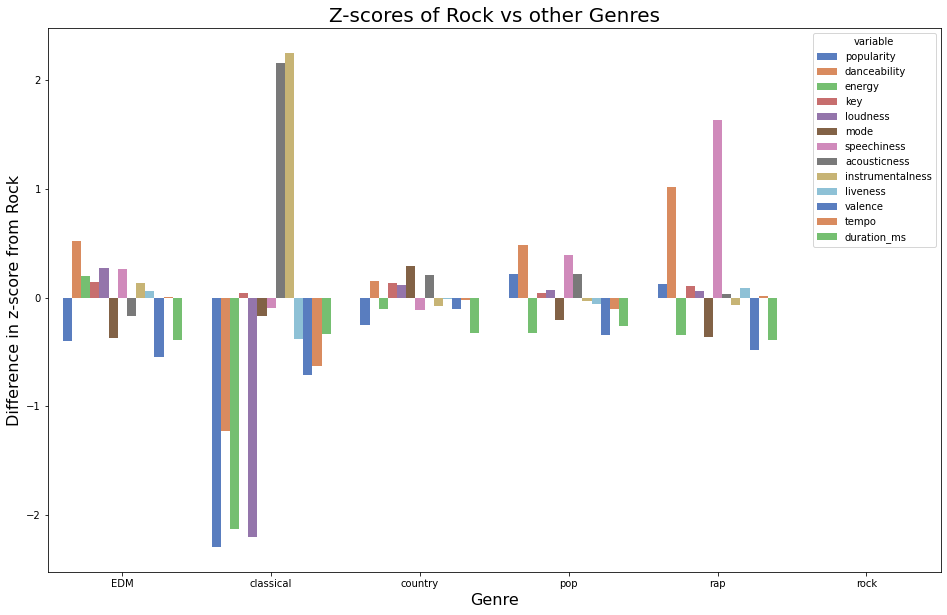

In [7]:
plt.figure(figsize=(16, 10))

sns.barplot(data=genres.reset_index().melt("genre"), x="genre", y="value", hue="variable", palette="muted")
plt.ylabel("Difference in z-score from Rock", size=16)
plt.xlabel("Genre", size=16)
plt.title("Z-scores of Rock vs other Genres", size=20)

In the process of our model creation, we found that pop was regularly confused for other genres, to the point of unusability. We decided to remove pop songs from our genre classifier for that reason. Why, specifically, is that the case? Let's look at a comparison of its Z-scores against the other genres, like we did for rock.

In [11]:
genres = data_s.groupby(by="genre").mean()

pop = genres.loc["pop"]

genres = genres - pop

Text(0.5, 1.0, 'Z-scores of Pop vs other Genres')

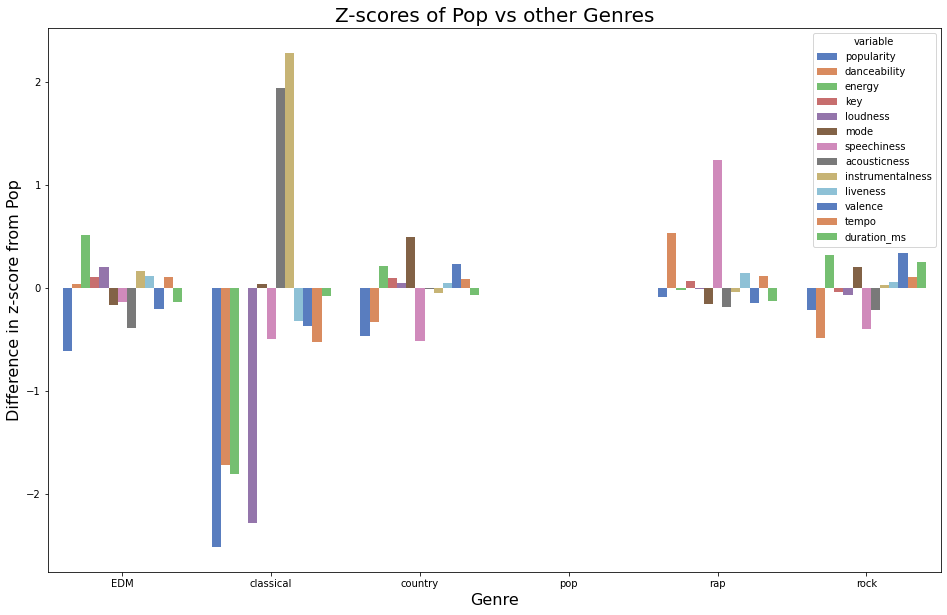

In [9]:
plt.figure(figsize=(16, 10))

sns.barplot(data=genres.reset_index().melt("genre"), x="genre", y="value", hue="variable", palette="muted")
plt.ylabel("Difference in z-score from Pop", size=16)
plt.xlabel("Genre", size=16)
plt.title("Z-scores of Pop vs other Genres", size=20)

Let's break down the differences between pop's characteristics and those of the other genres, excluding classical from most of this discussion due to its massive differences.
* Pop has the highest popularity, but rap is only slightly lower.
* Pop's danceability is middle-of-the-road, higher than some and lower than others.
* A similar story with energy, though pop's energy may be on the lower end.
* Key is mostly irrelevant in our opinion. The differences are very small.
* Pop's loudness also does not differ very much from most of the genres.
* Except for country, the mode (major/minor) of pop also does not differ much from the others.
* Pop's speechiness is rather high, except when compared to rap.
* Acousticness is slightly higher than the others, but not significantly.
* Instrumentalness varies very little by genre (except classical, of course).
* Liveness appears to be on the lower end, but not by much.
* Valence also seems to be middle of the road.
* Tempo is slightly lower than the others.
* With the exception of rock, duration is on the higher end.

Almost all of pop's characteristics land in the middle of the other genres, or only set themselves apart by a small margin. This makes it especially hard for a classifier such as ours to make distinctions between pop and other genres. Rock and country are a similar story, but they have some identifying traits which differ intensely from the others, such as tempo. 

-------------------------